# Homework 5 - Representation Learning and Word Embeddings

In this assignment, you will explore word embeddings using Word2Vec and other techniques. You will also visualize the learned embeddings and perform various tasks to understand the properties and applications of word embeddings.

You will:
1. Load pre-trained word embeddings using gensim.
2. Compute cosine similarity between word vectors.
3. Solve word analogy problems using word embeddings.
4. Visualize word embeddings using PCA.
5. Analyze the effect of singular/plural forms and comparative/superlative forms of words in the embedding space.


## Task 1: Load Pre-trained Word Embeddings (1 pt)

You will load pre-trained word embeddings using the gensim library. You will also get the embedding for a specific word and check its dimensionality.

In [3]:
!pip install --upgrade gensim
import gensim.downloader as api

# Load pre-trained word vectors
word_vectors = api.load("glove-wiki-gigaword-100")
embedding_computer = word_vectors["computer"]

print(f"Embedding for 'computer': {embedding_computer}")
print(f"Dimension of the embedding: {embedding_computer.shape[0]}")

[==================================================] 100.0% 128.1/128.1MB downloaded
Embedding for 'computer': [-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.1972e-01
 -9.9605e-04 

## Task 2: Compute Cosine Similarity (1 pt)

In this task, you will implement a function to compute the cosine similarity between two vectors from scratch (i.e., without using built-in functions except `math.sqrt()`). You will then use this function to compute the similarity between several pairs of words. Understanding cosine similarity is crucial for working with word embeddings and other vector representations.

In [5]:
import numpy as np
import math

def cosine_similarity(vec1, vec2):
    # TODO: Implement function to compute cosine similarity between two embeddings vec1 and vec2
    dot_product = sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

    magnitude_vec1 = math.sqrt(sum(v1 * v1 for v1 in vec1))
    magnitude_vec2 = math.sqrt(sum(v2 * v2 for v2 in vec2))

    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0  # If either vector has zero magnitude, return 0 similarity

    return dot_product / (magnitude_vec1 * magnitude_vec2)

# Compute similarity between pairs of words
words = [('computer', 'science'), ('boy', 'girl'), ('king', 'queen'), ('man', 'woman'), ('apple', 'orange'), ('cat', 'dog')]
for word1, word2 in words:
    vec1 = word_vectors[word1]
    vec2 = word_vectors[word2]
    similarity = cosine_similarity(vec1, vec2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

Cosine similarity between 'computer' and 'science': 0.5621562187195148
Cosine similarity between 'boy' and 'girl': 0.9175729738558787
Cosine similarity between 'king' and 'queen': 0.7507690778041988
Cosine similarity between 'man' and 'woman': 0.8323494265934944
Cosine similarity between 'apple' and 'orange': 0.5007039766371439
Cosine similarity between 'cat' and 'dog': 0.8798075153070002


## Task 3: Solve Word Analogies (1 pt)

In this task, you will use the word embeddings to solve word analogy problems. For example, you can solve the analogy `queen: woman :: ?:man` by finding the word that is most similar to the result of the operation `queen - woman + man`.

Use gensim's built-in function `most_similar` to find the word most similar to the result of vector arithmetic operations

This task illustrated the power of word embeddings in capturing semantic relationships.

In [11]:
# Solve word analogies
analogies = [
    ('queen', 'woman', 'man'),
    ('dad', 'man', 'woman'),
    ('paris', 'france', 'italy'),
    ('sun', 'day', 'night'),
    ('tree', 'forest', 'river'),
    ('happy', 'joy', 'sad')
]
for word1, word2, word3 in analogies:
    #TODO: Solve the analogies above by finding the word most similar (your_answer) to the result of vector arithmetic operations described.
      result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]

      your_answer = word_vectors.most_similar([result_vector], topn=10)

      # Filter out words in the analogy
      for word, _ in your_answer:
          if word not in {word1, word2, word3}:
              print(f"{word1} - {word2} + {word3} = {word}")
              break  # Stop at the first valid answer

queen - woman + man = king
dad - man + woman = mom
paris - france + italy = rome
sun - day + night = sky
tree - forest + river = creek
happy - joy + sad = sorry


***I feel as though sky should be moon...***

## Task 4: Visualize Word Embeddings

Next, we will visualize word embeddings using PCA (Principal Component Analysis). We will select a set of words, get their embeddings, and plot them in a 2D space. This visualization can help us in understanding the structure and relationships in the embedding space.

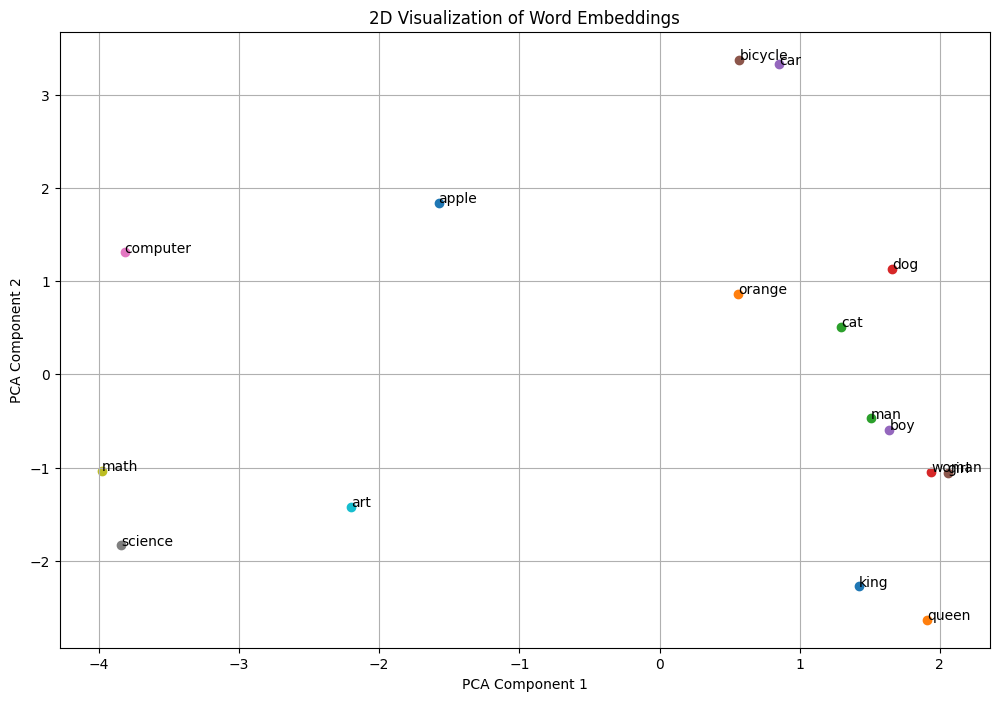

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of words to visualize
words_to_visualize = ['king', 'queen', 'man', 'woman', 'boy', 'girl', 'computer', 'science', 'math', 'art', 'apple', 'orange', 'cat', 'dog', 'car', 'bicycle']
embeddings = [word_vectors[word] for word in words_to_visualize]

# Reduce dimensionality
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(words_to_visualize):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Word Embeddings')
plt.grid(True)
plt.show()

## Task 5: Analyze Singular and Plural Forms

Next, we will analyze the singular and plural forms of several nouns and their relations in the embedding space. We will select a set of words, get their embeddings, and visualize them. This can help understand how embeddings represent morphological variations.

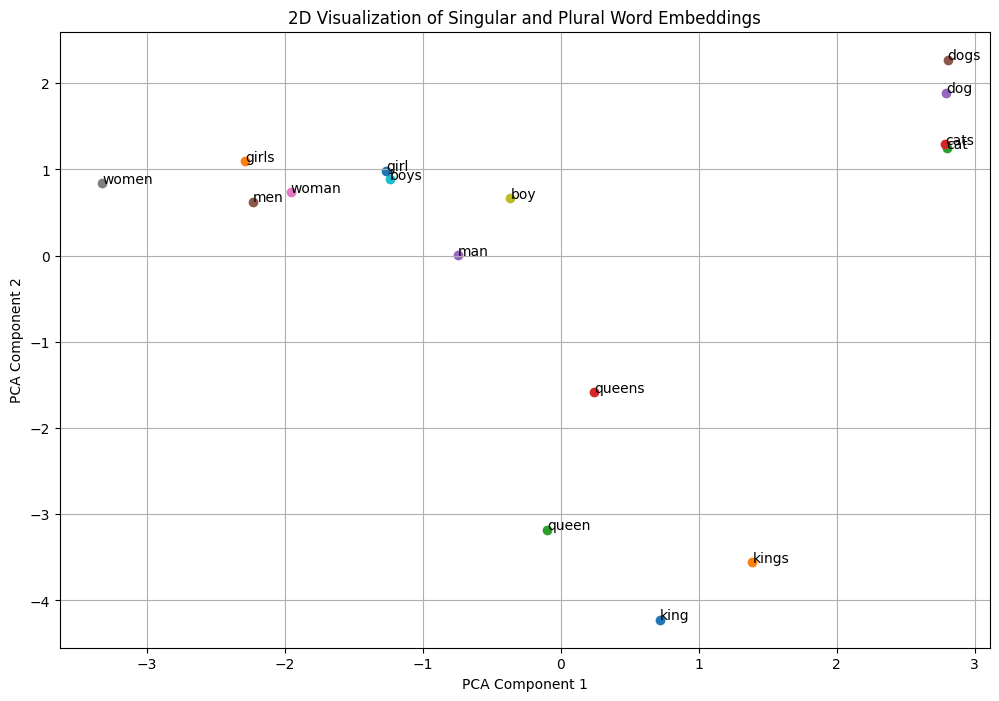

In [13]:
# List of singular and plural words
singular_plural_words = ['king', 'kings', 'queen', 'queens', 'man', 'men', 'woman', 'women', 'boy', 'boys', 'girl', 'girls', 'cat', 'cats', 'dog', 'dogs']
embeddings_singular_plural = [word_vectors[word] for word in singular_plural_words]

# Reduce dimensionality
embeddings_singular_plural_2d = pca.fit_transform(embeddings_singular_plural)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(singular_plural_words):
    plt.scatter(embeddings_singular_plural_2d[i, 0], embeddings_singular_plural_2d[i, 1])
    plt.annotate(word, (embeddings_singular_plural_2d[i, 0], embeddings_singular_plural_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Singular and Plural Word Embeddings')
plt.grid(True)
plt.show()

## Task 6: Analyze Adjectives and Their Forms

Next, we will analyze the comparative and superlative forms of several adjectives and their relations in the embedding space. We will select a set of words, get their embeddings, and visualize them.

This can help us in understanding how word embeddings capture comparative and superlative relations.

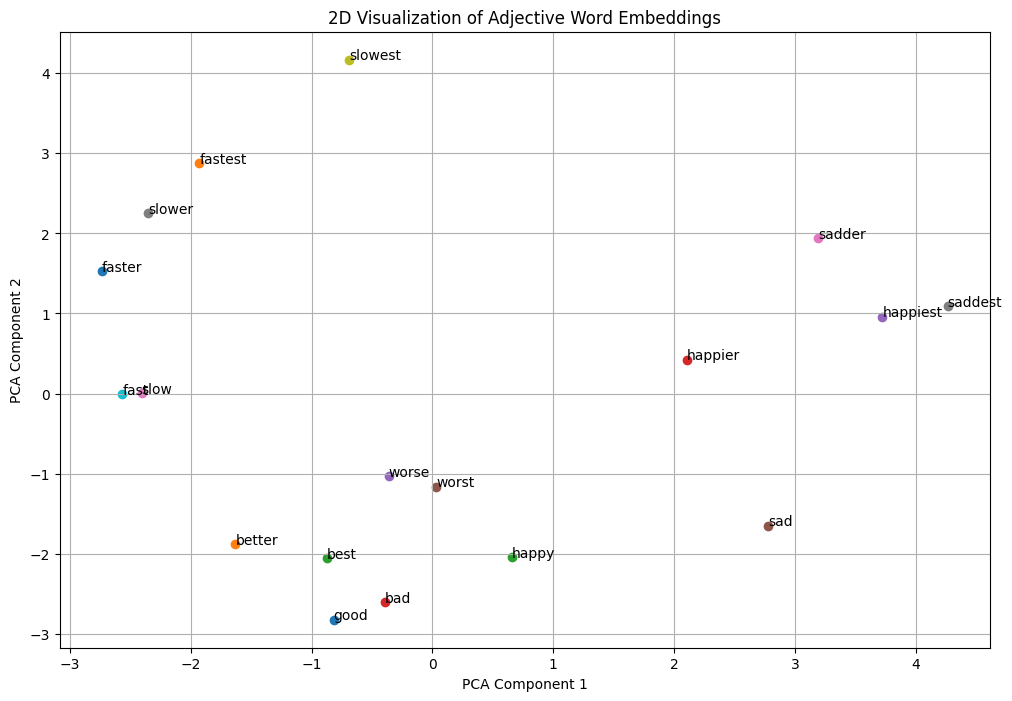

In [14]:
# List of adjectives and their comparative and superlative forms
adjectives = ['good', 'better', 'best', 'bad', 'worse', 'worst', 'slow', 'slower', 'slowest', 'fast', 'faster', 'fastest', 'happy', 'happier', 'happiest', 'sad', 'sadder', 'saddest']
embeddings_adjectives = [word_vectors[word] for word in adjectives]

# Reduce dimensionality
embeddings_adjectives_2d = pca.fit_transform(embeddings_adjectives)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(adjectives):
    plt.scatter(embeddings_adjectives_2d[i, 0], embeddings_adjectives_2d[i, 1])
    plt.annotate(word, (embeddings_adjectives_2d[i, 0], embeddings_adjectives_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Adjective Word Embeddings')
plt.grid(True)
plt.show()


## Summary (1 pt)

Briefly summarize your qualitative findings from Tasks 4, 5 and 6.

Animals are close to human descriptors like mom, dad, etc. due to them all being beings. Orange is not close to apple because it has dual meaning between the color and the fruit. Plurals that simply added an 's' to become plural are closer to the singular form than plurals that require more of a word change. Bad and good are much closer than bad and worse which is interesting. You can visually see the increase of magnitude in the adjectives from happy to happier to happiest.